### Project Overview
**Objective**
- Using the rainfall dataset to develop a predictive model that can forecast rainfall patterns and anomalies. This information can be used to identify areas at high risk of flooding or other rainfall-related damages.

##### Columns
- date: The date of the rainfall data (in dekadal format, i.e., every 10 days)
- adm2_id: The unique identifier for the 2nd level administrative division (e.g., district)
- ADM2_PCODE: The code for the 2nd level administrative division
- n_pixels: The number of input pixels used to create the rainfall aggregates
- rfh: The 10-day rainfall [mm]
- rfh_avg: The long-term average 10-day rainfall [mm]
- r1h: The 1-month rolling rainfall aggregation [mm]
- r1h_avg: The long-term average 1-month rolling rainfall aggregation [mm]
- r3h: The 3-month rolling rainfall aggregation [mm]
- r3h_avg: The long-term average 3-month rolling rainfall aggregation [mm]
- rfq: The rainfall anomaly [%]
- r1q: The 1-month rainfall anomaly [%]
- r3q: The 3-month rainfall anomaly [%]

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/pak-rainfall-indicators-at-subnational-level/pak-rainfall.csv


In [2]:
df=pd.read_csv('/kaggle/input/pak-rainfall-indicators-at-subnational-level/pak-rainfall.csv')

In [3]:
df.head()

,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
0,#date,#adm2+id,#adm2+code,#indicator+n_pixels+num,#indicator+rfh+num,#indicator+rfh_avg+num,#indicator+r1h+num,#indicator+r1h_avg+num,#indicator+r3h+num,#indicator+r3h_avg+num,#indicator+rfq+pct,#indicator+r1q+pct,#indicator+r3q+pct,#status
1,1/1/2020,1009036,PK401,36,45.7778,20.9926,65.4167,41.3056,137.9722,95.5806,195.3548,146.9951,140.151,final
2,1/11/2020,1009036,PK401,36,40.6389,21.4537,88.1111,53.6083,163.1944,104.1611,172.5236,154.2425,151.7105,final
3,1/21/2020,1009036,PK401,36,15.75,29.4389,102.1667,71.8852,174.9444,121.612,60.2517,136.9804,140.5224,final
4,2/1/2020,1009036,PK401,36,2.8056,33.8259,59.1944,84.7185,163.0556,148.0556,20.104,73.0527,109.4903,final


In [4]:
df.shape

(4741, 14)

In [5]:
## dropping first row as you can see it's like a header
df = df.drop(0).reset_index(drop=True)

In [6]:
df.head()

,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
0,1/1/2020,1009036,PK401,36,45.7778,20.9926,65.4167,41.3056,137.9722,95.5806,195.3548,146.9951,140.151,final
1,1/11/2020,1009036,PK401,36,40.6389,21.4537,88.1111,53.6083,163.1944,104.1611,172.5236,154.2425,151.7105,final
2,1/21/2020,1009036,PK401,36,15.75,29.4389,102.1667,71.8852,174.9444,121.612,60.2517,136.9804,140.5224,final
3,2/1/2020,1009036,PK401,36,2.8056,33.8259,59.1944,84.7185,163.0556,148.0556,20.104,73.0527,109.4903,final
4,2/11/2020,1009036,PK401,36,18.3889,33.8713,36.9444,97.1361,162.7778,175.8167,60.1701,43.8176,92.9829,final


In [7]:
df.columns

Index(['date', 'adm2_id', 'ADM2_PCODE', 'n_pixels', 'rfh', 'rfh_avg', 'r1h',
       'r1h_avg', 'r3h', 'r3h_avg', 'rfq', 'r1q', 'r3q', 'version'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4740 entries, 0 to 4739
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        4740 non-null   object
 1   adm2_id     4740 non-null   object
 2   ADM2_PCODE  4740 non-null   object
 3   n_pixels    4740 non-null   object
 4   rfh         4740 non-null   object
 5   rfh_avg     4740 non-null   object
 6   r1h         4740 non-null   object
 7   r1h_avg     4740 non-null   object
 8   r3h         4740 non-null   object
 9   r3h_avg     4740 non-null   object
 10  rfq         4740 non-null   object
 11  r1q         4740 non-null   object
 12  r3q         4740 non-null   object
 13  version     4740 non-null   object
dtypes: object(14)
memory usage: 518.6+ KB


In [9]:
print(df.isnull().sum())
print(df.duplicated().sum())

date          0
adm2_id       0
ADM2_PCODE    0
n_pixels      0
rfh           0
rfh_avg       0
r1h           0
r1h_avg       0
r3h           0
r3h_avg       0
rfq           0
r1q           0
r3q           0
version       0
dtype: int64
0


- No null & duplicated values in this dataset

In [10]:
# Renaming the columns names for better understanding
df.rename(columns={
    'date': 'Date',
    'adm2_id': 'AdminDivisionID',
    'ADM2_PCODE': 'AdminDivisionCode',
    'n_pixels': 'PixelCount',
    'rfh': '10DayRainfall',
    'rfh_avg': '10DayRainfallAvg',
    'r1h': '1MonthRainfall',
    'r1h_avg': '1MonthRainfallAvg',
    'r3h': '3MonthRainfall',
    'r3h_avg': '3MonthRainfallAvg',
    'rfq': 'RainfallAnomaly',
    'r1q': '1MonthRainfallAnomaly',
    'r3q': '3MonthRainfallAnomaly',
    'version': 'DataVersion'
}, inplace=True)

In [11]:
df.columns

Index(['Date', 'AdminDivisionID', 'AdminDivisionCode', 'PixelCount',
       '10DayRainfall', '10DayRainfallAvg', '1MonthRainfall',
       '1MonthRainfallAvg', '3MonthRainfall', '3MonthRainfallAvg',
       'RainfallAnomaly', '1MonthRainfallAnomaly', '3MonthRainfallAnomaly',
       'DataVersion'],
      dtype='object')

In [12]:
df.dtypes

Date                     object
AdminDivisionID          object
AdminDivisionCode        object
PixelCount               object
10DayRainfall            object
10DayRainfallAvg         object
1MonthRainfall           object
1MonthRainfallAvg        object
3MonthRainfall           object
3MonthRainfallAvg        object
RainfallAnomaly          object
1MonthRainfallAnomaly    object
3MonthRainfallAnomaly    object
DataVersion              object
dtype: object

In [13]:
df.sample(3)

,Date,AdminDivisionID,AdminDivisionCode,PixelCount,10DayRainfall,10DayRainfallAvg,1MonthRainfall,1MonthRainfallAvg,3MonthRainfall,3MonthRainfallAvg,RainfallAnomaly,1MonthRainfallAnomaly,3MonthRainfallAnomaly,DataVersion
662,11/1/2020,1009028,PK626,396,1.0758,0.9024,2.3586,3.3109,107.6212,65.7065,102.9364,92.8453,155.3648,final
1804,11/1/2021,1009007,PK519,167,0.9281,1.5882,3.1437,4.8864,82.0599,108.7265,89.9809,88.2933,77.5394,final
534,9/1/2021,1009027,PK601,857,124.7713,33.7354,207.4189,162.9574,577.4096,442.9997,335.0196,125.7066,129.6711,final


In [14]:
## we have to change data types of some column for ex. date 
df['Date']=pd.to_datetime(df['Date'])

In [15]:
df[['AdminDivisionID', 'PixelCount']] = df[['AdminDivisionID', 'PixelCount']].apply(pd.to_numeric)

In [16]:
cols = [
    '10DayRainfall',
    '10DayRainfallAvg',
    '1MonthRainfall',
    '1MonthRainfallAvg',
    '3MonthRainfall',
    '3MonthRainfallAvg',
    'RainfallAnomaly',
    '1MonthRainfallAnomaly',
    '3MonthRainfallAnomaly'
]

# Convert specified columns dtype object to float
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [17]:
df.dtypes

Date                     datetime64[ns]
AdminDivisionID                   int64
AdminDivisionCode                object
PixelCount                        int64
10DayRainfall                   float64
10DayRainfallAvg                float64
1MonthRainfall                  float64
1MonthRainfallAvg               float64
3MonthRainfall                  float64
3MonthRainfallAvg               float64
RainfallAnomaly                 float64
1MonthRainfallAnomaly           float64
3MonthRainfallAnomaly           float64
DataVersion                      object
dtype: object

- Now it's fixed

### Starting with visulizations

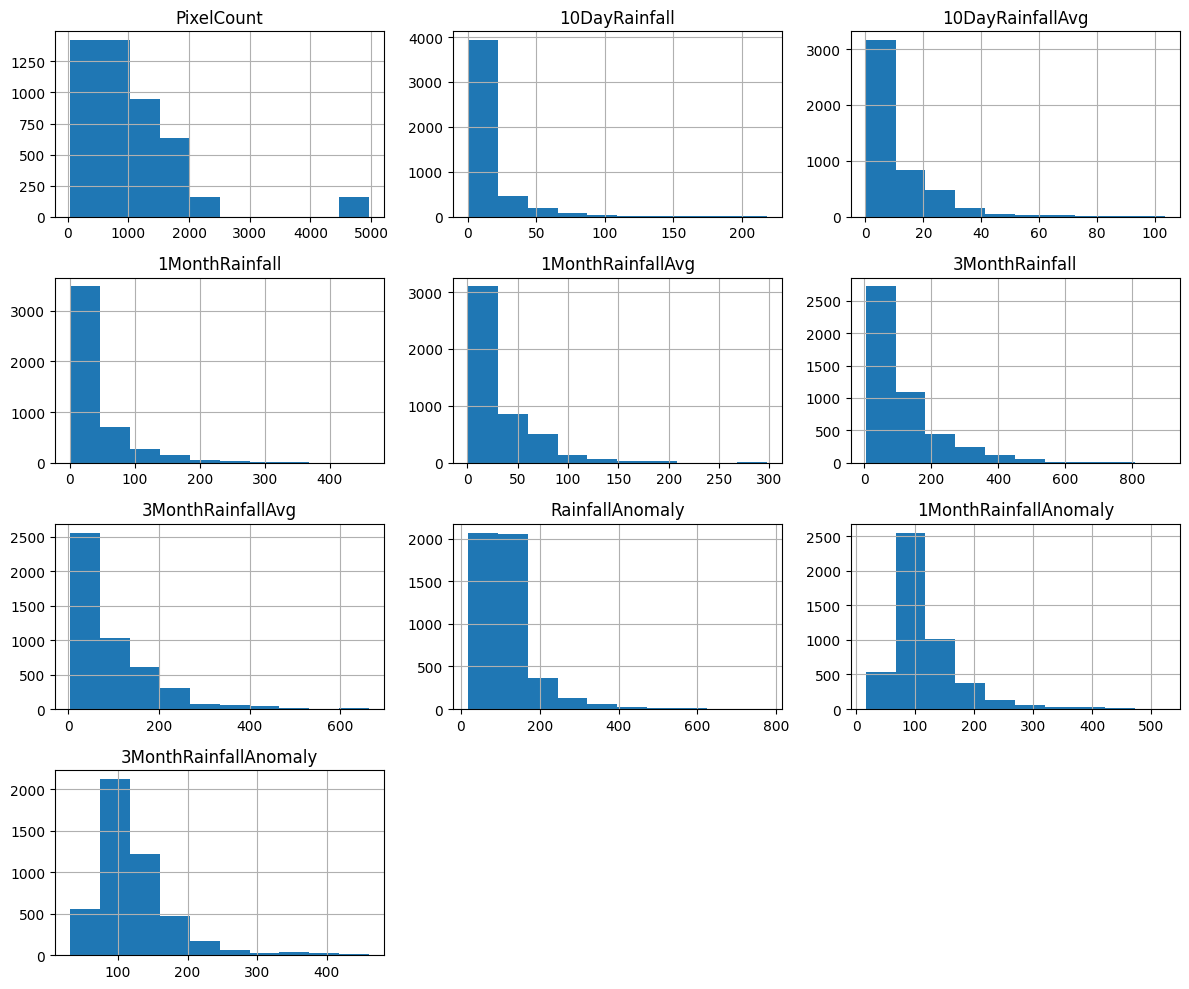

In [18]:
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols].drop(columns='AdminDivisionID').hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

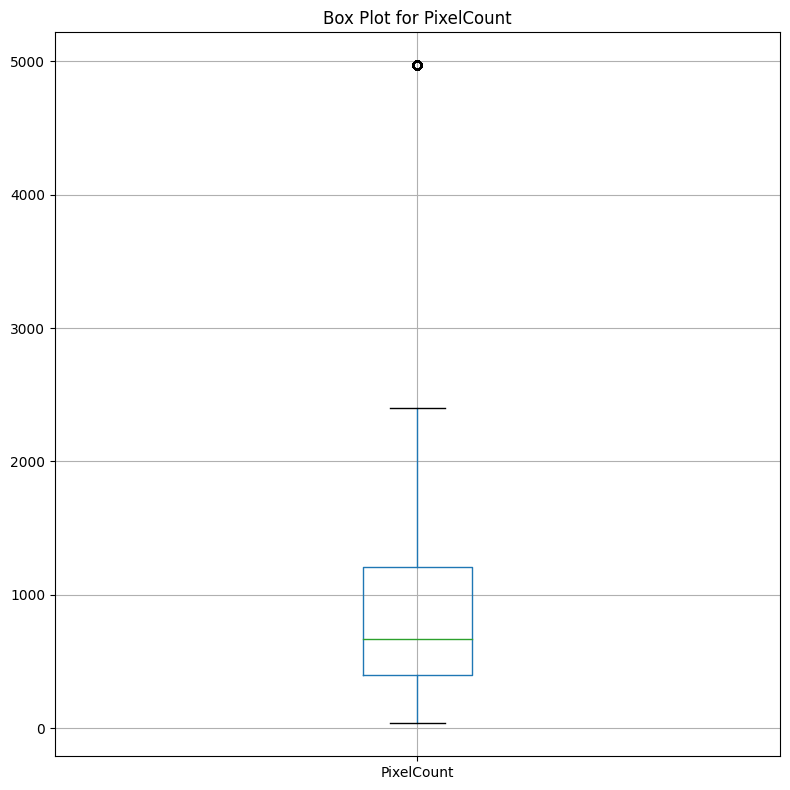

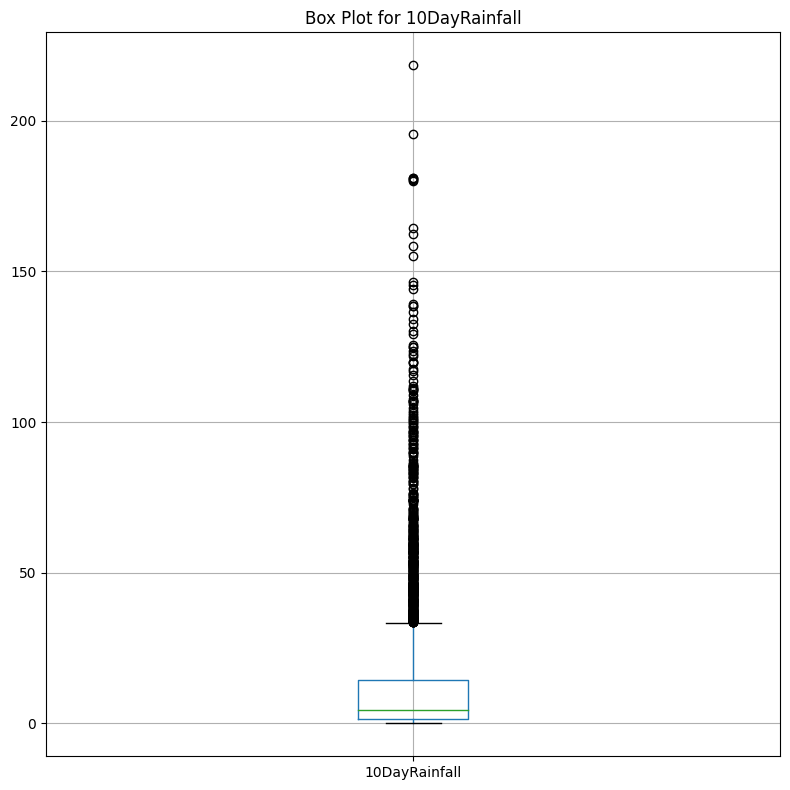

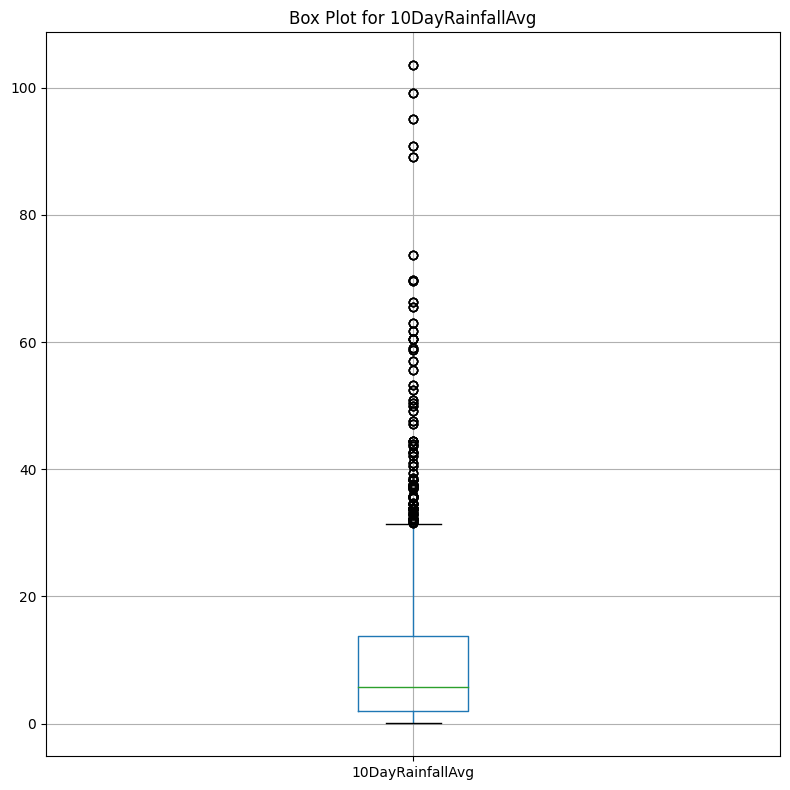

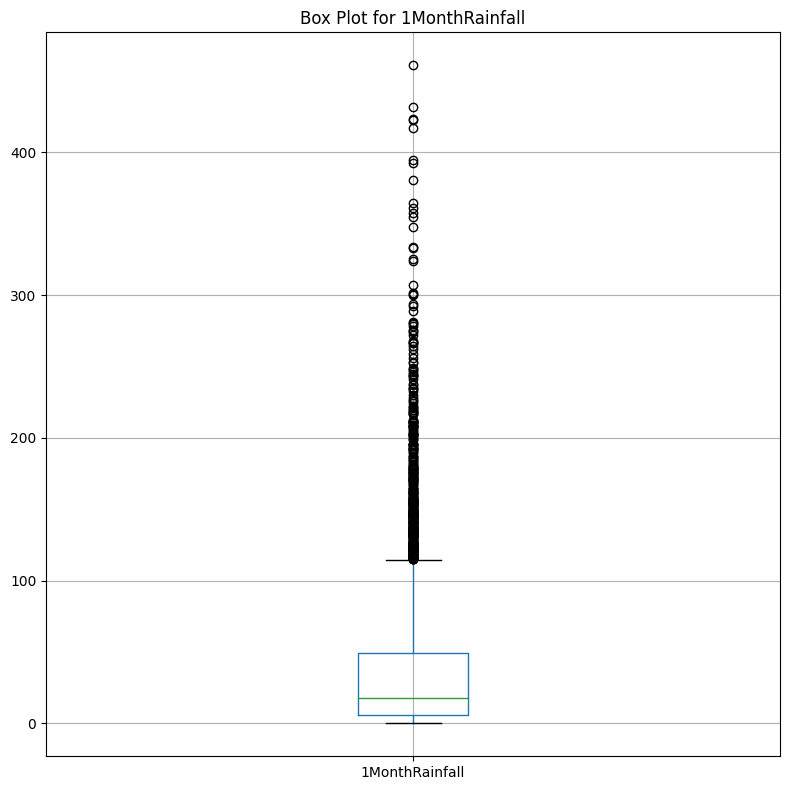

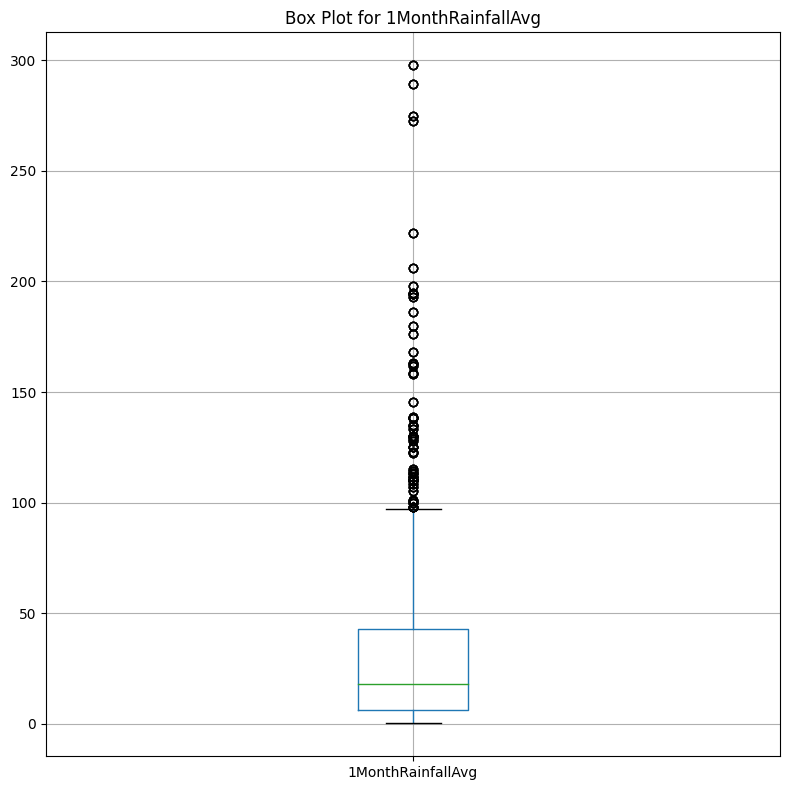

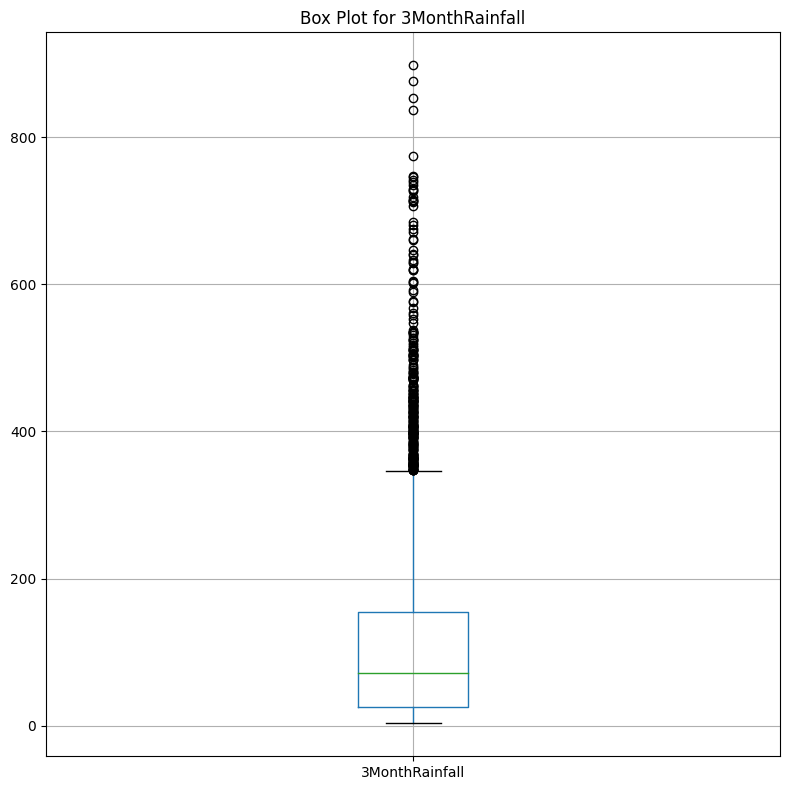

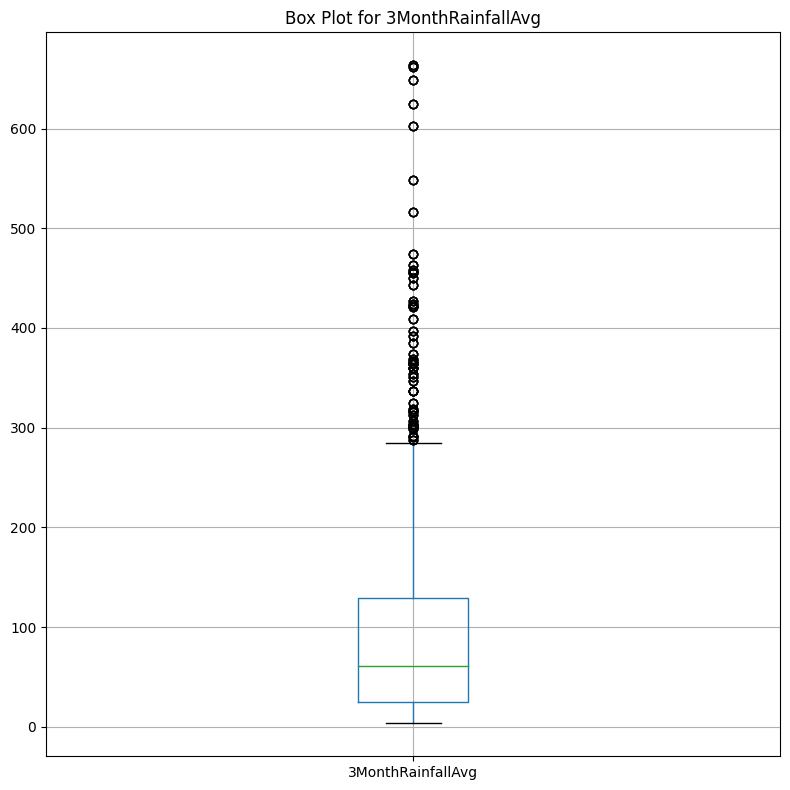

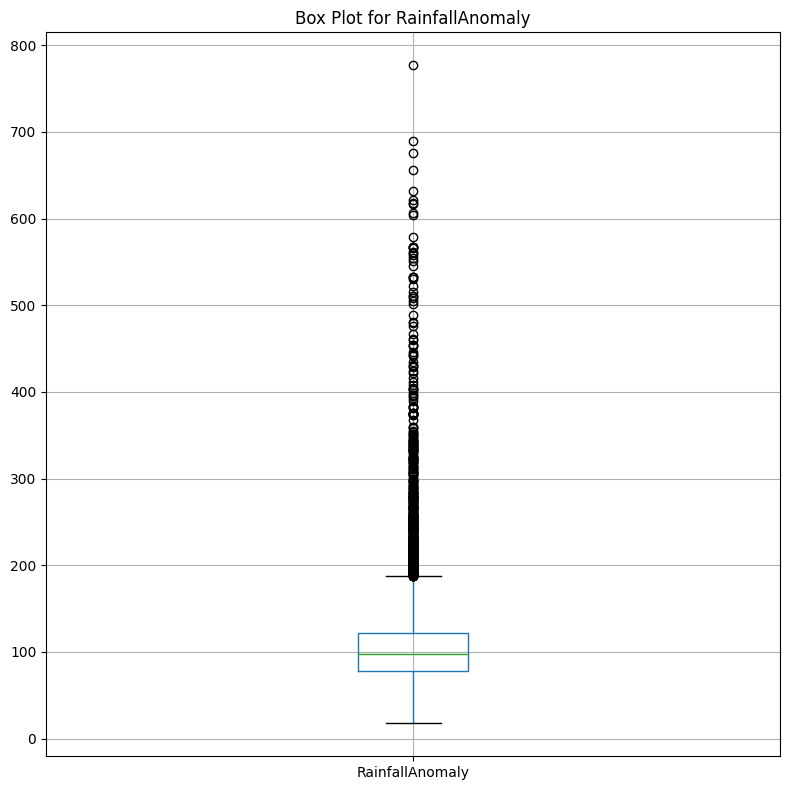

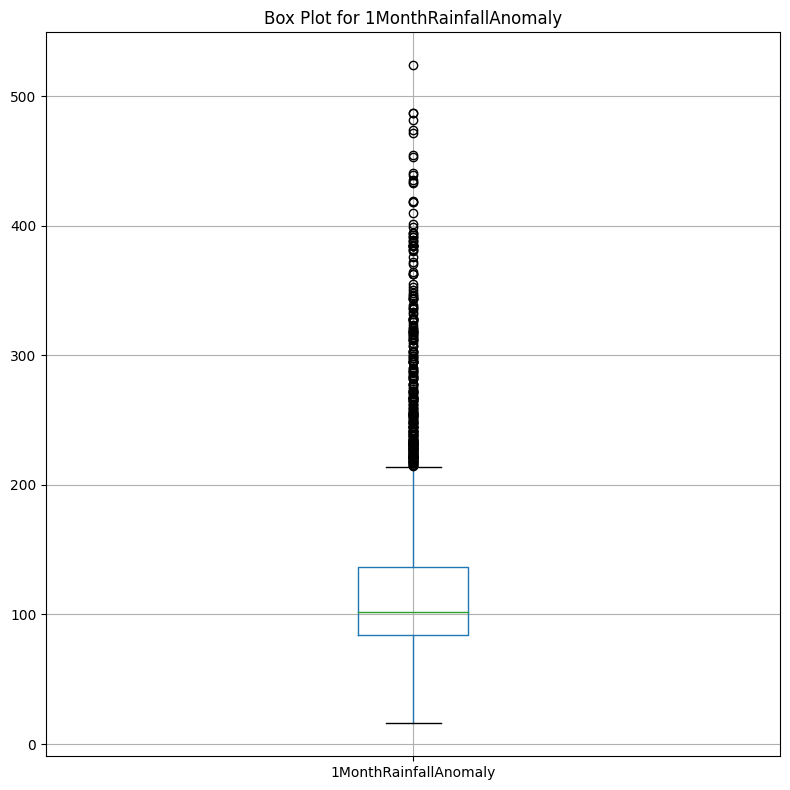

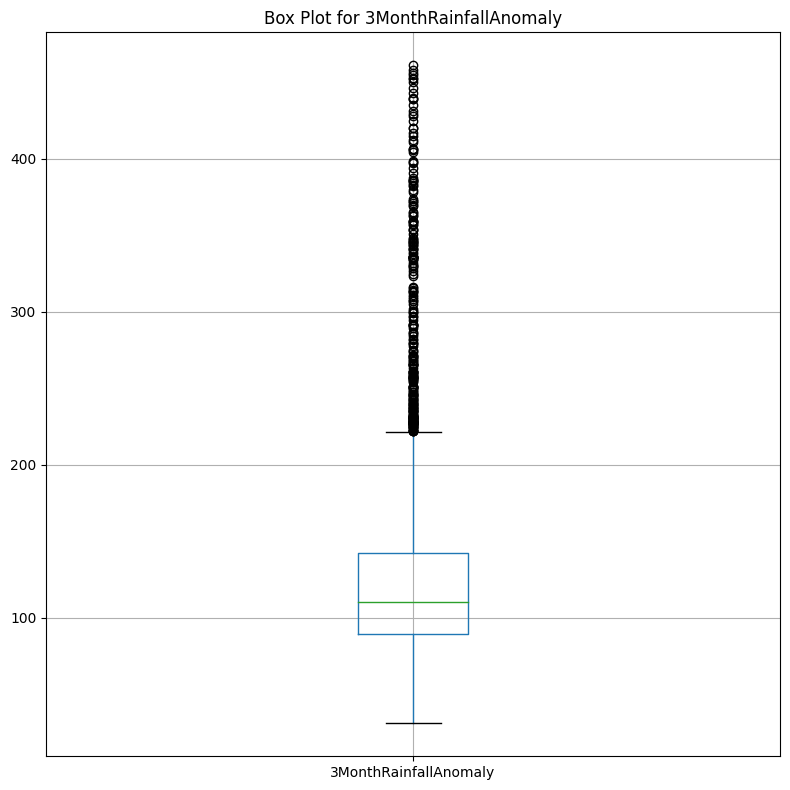

In [19]:
num_cols = [col for col in num_cols if col != 'AdminDivisionID']
for col in num_cols:
    plt.figure(figsize=(8, 8))
    df.boxplot(column=col)
    plt.title(f'Box Plot for {col}')
    plt.tight_layout()
    plt.show()

In [20]:
df['DataVersion'].value_counts()

DataVersion
final     4680
prelim      60
Name: count, dtype: int64

- for further analysis,train/test split /model we will use Final dataversionof dataset

In [21]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

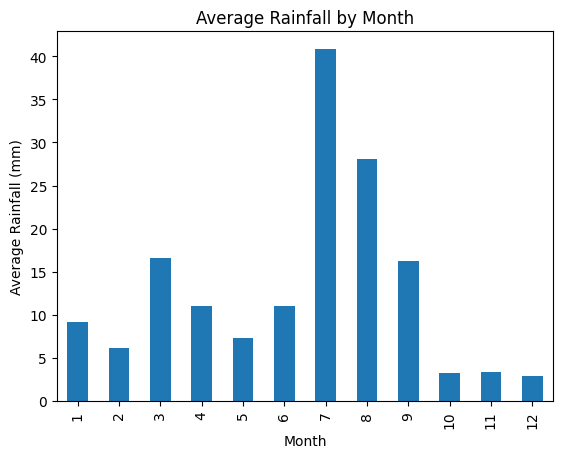

In [22]:
monthly_rainfall = df.groupby('Month')['10DayRainfall'].mean()
monthly_rainfall.plot(kind='bar', title='Average Rainfall by Month')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.show()


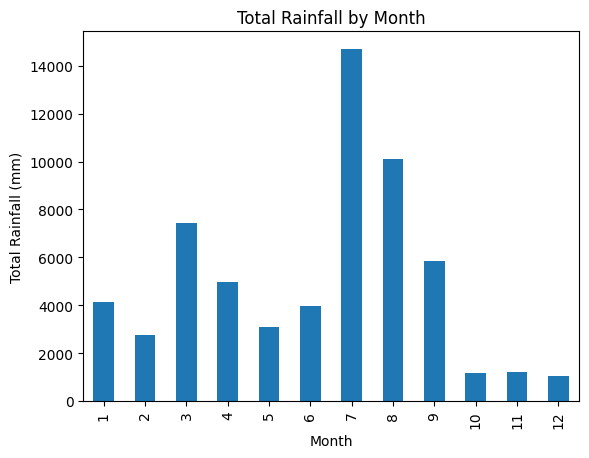

In [23]:
total_monthly_rainfall = df.groupby('Month')['10DayRainfall'].sum()
total_monthly_rainfall.plot(kind='bar', title='Total Rainfall by Month')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.show()


In [24]:
final_data = df[df['DataVersion'] == 'final']


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report


In [26]:
df['Target_1MonthRainfall'] = df['1MonthRainfall'].shift(-1)  # Predict next month's rainfall
df['Target_3MonthRainfall'] = df['3MonthRainfall'].shift(-1)  # Predict next 3 months' rainfall

# Drop rows with NaN in the target column
df = df.dropna(subset=['Target_1MonthRainfall', 'Target_3MonthRainfall'])

In [27]:
X = df[['10DayRainfall', '10DayRainfallAvg', '1MonthRainfall', '1MonthRainfallAvg',
        '3MonthRainfall', '3MonthRainfallAvg', 'RainfallAnomaly',
        '1MonthRainfallAnomaly', '3MonthRainfallAnomaly']]
y = df['Target_1MonthRainfall']  # or 'Target_3MonthRainfall'


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear Regression

In [29]:
 model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

MAE: 11.69
MSE: 429.45
RMSE: 20.72
R-squared: 0.86


## Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Predict
y_pred = rf_regressor.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Random Forest Regressor Results:')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Random Forest Regressor Results:
MAE: 10.51
RMSE: 18.97
R-squared: 0.88


- The MAE and RMSE are relatively low, indicating that the model is performing well in terms of prediction accuracy.
- The R-squared value of 0.88 suggests that the model captures most of the variability in the target variable, which is a good sign of model performance.